**Reading data:**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

**data Profiling:**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Basic information
info = df.info()

# Summary statistics
describe = df.describe(include='all')

# Count of missing values
missing_values = df.isnull().sum()

# Count of duplicates
num_duplicates = df.duplicated().sum()

# Data types
data_types = df.dtypes

# Unique values in categorical columns
unique_status = df["System_Status"].unique()
unique_comments = df["Comments"].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Room_ID                   960 non-null    object 
 1   Temperature (C)           960 non-null    object 
 2   Humidity (%)              961 non-null    object 
 3   Air_Flow (CFM)            960 non-null    float64
 4   Pressure (Pa)             959 non-null    float64
 5   Energy_Consumption (kWh)  959 non-null    object 
 6   Occupancy                 958 non-null    float64
 7   Date_Logged               960 non-null    object 
 8   CO2_Level (ppm)           961 non-null    float64
 9   System_Status             959 non-null    object 
 10  Set_Point (F)             960 non-null    float64
 11  Filter_Change_Date        960 non-null    object 
 12  Comments                  395 non-null    object 
dtypes: float64(5), object(8)
memory usage: 102.7+ KB


**Data Profiling Summary**

In [3]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("\n Missing Values per Column:",missing_values.to_string())
print("Number of Duplicate Rows:", num_duplicates)
print("System_Status Unique Entries:", unique_status)
print("Comments Unique Entries:", unique_comments)

Total Rows: 1010
Total Columns: 13

 Missing Values per Column: Room_ID                      50
Temperature (C)              50
Humidity (%)                 49
Air_Flow (CFM)               50
Pressure (Pa)                51
Energy_Consumption (kWh)     51
Occupancy                    52
Date_Logged                  50
CO2_Level (ppm)              49
System_Status                51
Set_Point (F)                50
Filter_Change_Date           50
Comments                    615
Number of Duplicate Rows: 10
System_Status Unique Entries: ['Off' 'On' 'ON' 'on' 'OFF' 'off' nan]
Comments Unique Entries: [nan 'needs inspection' 'ok']


**Visual Profiling**

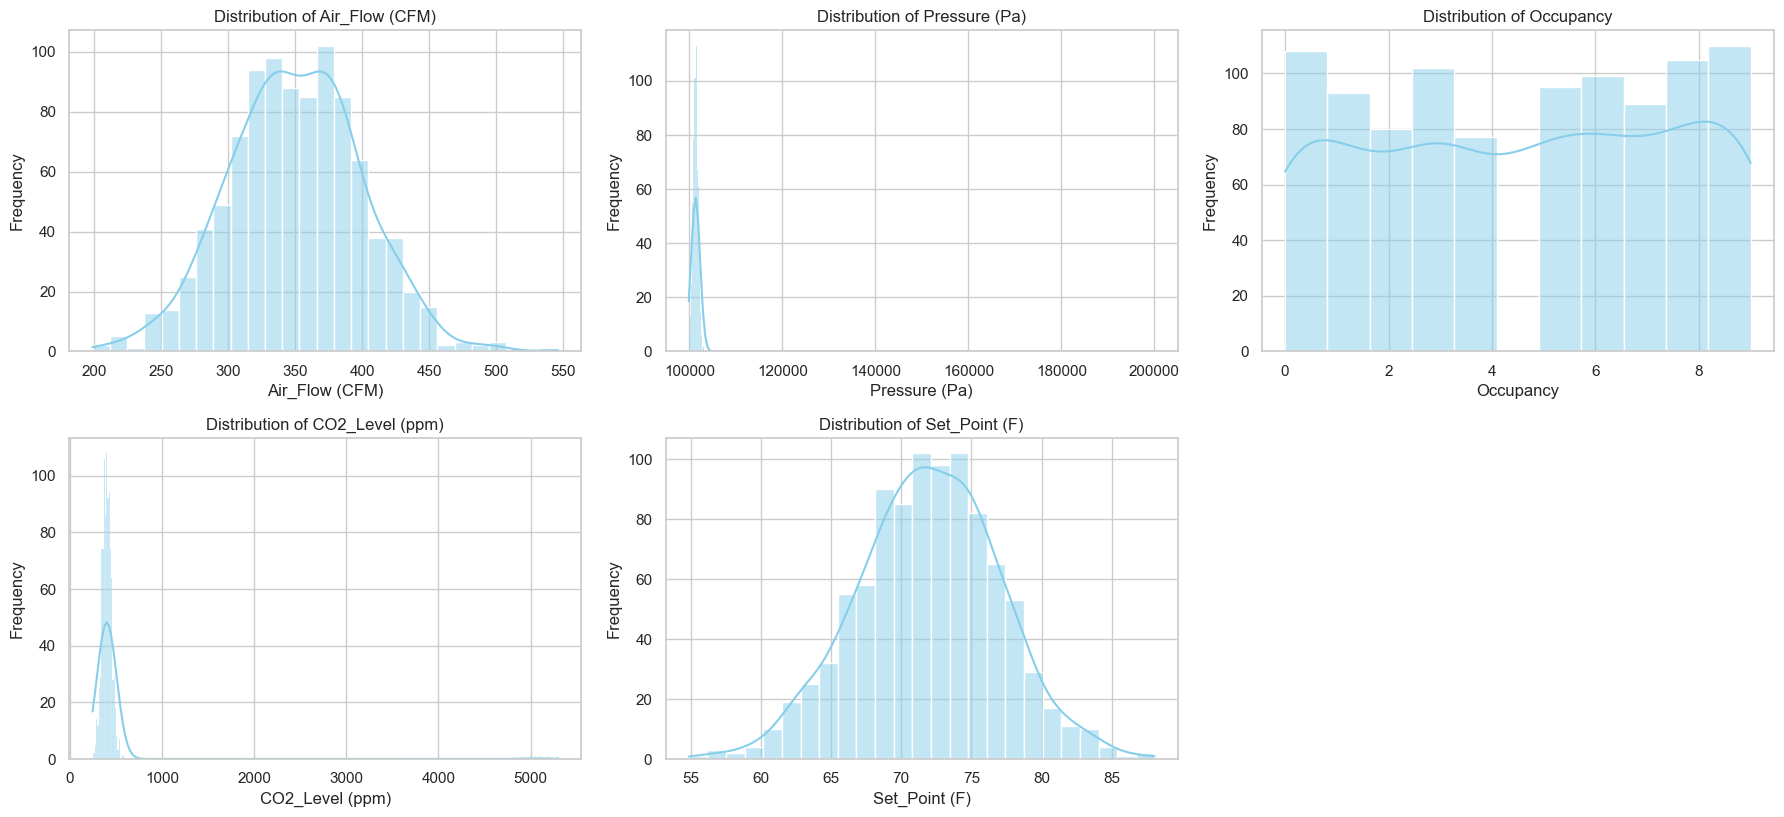

In [4]:
# Plot distribution of numerical features (excluding mixed or object types)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms for each numerical column
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

**Data Cleaning:**

In [5]:
#  Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Fix mixed types: Temperature, Humidity, Energy, Set_Point
def convert_numeric(column):
    return pd.to_numeric(column.replace({'twenty-two': np.nan, 'fifty': np.nan, '15kWh': 15}, regex=True), errors='coerce')

df_cleaned["Temperature (C)"] = convert_numeric(df_cleaned["Temperature (C)"])
df_cleaned["Humidity (%)"] = convert_numeric(df_cleaned["Humidity (%)"])
df_cleaned["Energy_Consumption (kWh)"] = convert_numeric(df_cleaned["Energy_Consumption (kWh)"])
df_cleaned["Set_Point (F)"] = convert_numeric(df_cleaned["Set_Point (F)"])

# Standardize System_Status
df_cleaned["System_Status"] = df_cleaned["System_Status"].str.strip().str.lower()

# Clean Comments field (replace empty strings and variants of 'none')
df_cleaned["Comments"] = df_cleaned["Comments"].replace(["", "None", "N/A"], np.nan)

# Convert date columns
df_cleaned["Date_Logged"] = pd.to_datetime(df_cleaned["Date_Logged"], errors='coerce')
df_cleaned["Filter_Change_Date"] = pd.to_datetime(df_cleaned["Filter_Change_Date"], errors='coerce')

# Impute missing numeric values with median
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[num_cols] = df_cleaned[num_cols].apply(lambda x: x.fillna(x.median()))

# Forward fill Room_ID and System_Status where missing
df_cleaned["Room_ID"] = df_cleaned["Room_ID"].fillna(method='ffill')
df_cleaned["System_Status"] = df_cleaned["System_Status"].fillna(method='bfill')

# Summary of remaining nulls
remaining_nulls = df_cleaned.isnull().sum()

# Display cleaned DataFrame sample
df_cleaned.head(), remaining_nulls


C:\Users\vc\AppData\Local\Temp\ipykernel_18276\1263931003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Temperature (C)"] = convert_numeric(df_cleaned["Temperature (C)"])
C:\Users\vc\AppData\Local\Temp\ipykernel_18276\1263931003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Humidity (%)"] = convert_numeric(df_cleaned["Humidity (%)"])
C:\Users\vc\AppData\Local\Temp\ipykernel_18276\1263931003.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

(  Room_ID  Temperature (C)  Humidity (%)  Air_Flow (CFM)  Pressure (Pa)  \
 0     R50        23.241785     63.993554      316.241086  100371.096221   
 1      R2        21.654339     59.246337      342.774066  100894.807495   
 2      R2        22.061275     50.596304      310.379004  101118.197233   
 3     R90        25.807575     43.530632      334.601924  102268.843829   
 4     R46        21.414617     56.982233      255.319267  101603.276562   
 
    Energy_Consumption (kWh)  Occupancy         Date_Logged  CO2_Level (ppm)  \
 0                 10.682532        7.0 2023-01-01 00:00:00       442.132886   
 1                 14.843983        0.0 2023-01-01 01:00:00       413.580946   
 2                 15.090084        7.0 2023-01-01 02:00:00       359.078384   
 3                 17.363152        5.0 2023-01-01 03:00:00       400.547391   
 4                  8.165708        3.0 2023-01-01 04:00:00       452.346137   
 
   System_Status  Set_Point (F)  Filter_Change_Date Comments

In [6]:
# Introduce issues again
for col in df.columns:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

df = pd.concat([df, df.sample(10)], ignore_index=True)

df.loc[5, "Temperature (C)"] = "twenty-two"
df.loc[10, "Humidity (%)"] = "fifty"
df.loc[50, "Energy_Consumption (kWh)"] = "15kWh"
df["Set_Point (F)"] = df["Set_Point (F)"].astype(str)

df.loc[100:105, "CO2_Level (ppm)"] = [5000, 5200, 5300, 4900, 5100, 5050]
df.loc[200, "Temperature (C)"] = 100
df.loc[300, "Pressure (Pa)"] = 200000

# Re-run data cleaning
def convert_numeric(column):
    return pd.to_numeric(column.replace({'twenty-two': np.nan, 'fifty': np.nan, '15kWh': 15}, regex=True), errors='coerce')

df_cleaned = df.drop_duplicates()
df_cleaned["Temperature (C)"] = convert_numeric(df_cleaned["Temperature (C)"])
df_cleaned["Humidity (%)"] = convert_numeric(df_cleaned["Humidity (%)"])
df_cleaned["Energy_Consumption (kWh)"] = convert_numeric(df_cleaned["Energy_Consumption (kWh)"])
df_cleaned["Set_Point (F)"] = convert_numeric(df_cleaned["Set_Point (F)"])
df_cleaned["System_Status"] = df_cleaned["System_Status"].str.strip().str.lower()
df_cleaned["Comments"] = df_cleaned["Comments"].replace(["", "None", "N/A"], np.nan)
df_cleaned["Date_Logged"] = pd.to_datetime(df_cleaned["Date_Logged"], errors='coerce')
df_cleaned["Filter_Change_Date"] = pd.to_datetime(df_cleaned["Filter_Change_Date"], errors='coerce')

# Fill numeric nulls with median
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[num_cols] = df_cleaned[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill forward/backward for categorical
df_cleaned["Room_ID"] = df_cleaned["Room_ID"].fillna(method='ffill')
df_cleaned["System_Status"] = df_cleaned["System_Status"].fillna(method='bfill')

# Remaining nulls
remaining_nulls = df_cleaned.isnull().sum()

df_cleaned.head(), remaining_nulls

C:\Users\vc\AppData\Local\Temp\ipykernel_18276\447660042.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Temperature (C)"] = convert_numeric(df_cleaned["Temperature (C)"])
C:\Users\vc\AppData\Local\Temp\ipykernel_18276\447660042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Humidity (%)"] = convert_numeric(df_cleaned["Humidity (%)"])
C:\Users\vc\AppData\Local\Temp\ipykernel_18276\447660042.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

(  Room_ID  Temperature (C)  Humidity (%)  Air_Flow (CFM)  Pressure (Pa)  \
 0     R50        22.046046     63.993554      316.241086  100371.096221   
 1      R2        21.654339     59.246337      342.774066  100894.807495   
 2      R2        22.046046     50.596304      310.379004  101118.197233   
 3     R90        25.807575     43.530632      334.601924  102268.843829   
 4     R46        22.046046     56.982233      255.319267  101603.276562   
 
    Energy_Consumption (kWh)  Occupancy         Date_Logged  CO2_Level (ppm)  \
 0                 10.682532        7.0 2023-01-01 00:00:00       442.132886   
 1                 14.843983        0.0 2023-01-01 01:00:00       401.640490   
 2                 15.090084        7.0 2023-01-01 02:00:00       359.078384   
 3                 17.363152        5.0 2023-01-01 03:00:00       400.547391   
 4                  8.165708        3.0 2023-01-01 04:00:00       452.346137   
 
   System_Status  Set_Point (F)  Filter_Change_Date Comments

**Data Transformation:**

- Convert Set_Point (F) from Fahrenheit to Celsius.

- Calculate a new feature: Cooling Load = Temperature (C) - Set Point (C).

- Convert Filter_Change_Date to the number of days since the last filter change.

- Convert Date_Logged to datetime and extract features like hour and day of the week.

In [7]:
# Step 1: Convert Set Point to Celsius
df_cleaned['Set_Point (C)'] = (df_cleaned['Set_Point (F)'] - 32) * 5.0 / 9.0

# Step 2: Cooling Load
df_cleaned['Cooling_Load (C)'] = df_cleaned['Temperature (C)'] - df_cleaned['Set_Point (C)']

# Step 3: Days since last filter change
df_cleaned['Days_Since_Filter_Change'] = (df_cleaned['Date_Logged'] - df_cleaned['Filter_Change_Date']).dt.days

# Step 4: Extract hour and day from Date_Logged
df_cleaned['Hour_Logged'] = df_cleaned['Date_Logged'].dt.hour
df_cleaned['Day_of_Week'] = df_cleaned['Date_Logged'].dt.day_name()

# Drop original Fahrenheit column
df_cleaned.drop(columns=['Set_Point (F)'], inplace=True)

# View transformed data
df_cleaned.head()

C:\Users\vc\AppData\Local\Temp\ipykernel_18276\63916832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Set_Point (C)'] = (df_cleaned['Set_Point (F)'] - 32) * 5.0 / 9.0
C:\Users\vc\AppData\Local\Temp\ipykernel_18276\63916832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cooling_Load (C)'] = df_cleaned['Temperature (C)'] - df_cleaned['Set_Point (C)']
C:\Users\vc\AppData\Local\Temp\ipykernel_18276\63916832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,Room_ID,Temperature (C),Humidity (%),Air_Flow (CFM),Pressure (Pa),Energy_Consumption (kWh),Occupancy,Date_Logged,CO2_Level (ppm),System_Status,Filter_Change_Date,Comments,Set_Point (C),Cooling_Load (C),Days_Since_Filter_Change,Hour_Logged,Day_of_Week
0,R50,22.046046,63.993554,316.241086,100371.096221,10.682532,7.0,2023-01-01 00:00:00,442.132886,on,2022-06-01 00:00:00,NaN,18.460784,3.585262,214.0,0.0,Sunday
1,R2,21.654339,59.246337,342.774066,100894.807495,14.843983,0.0,2023-01-01 01:00:00,401.640490,on,2022-06-01 07:00:00,NaN,16.870919,4.783421,213.0,1.0,Sunday
2,R2,22.046046,50.596304,310.379004,101118.197233,15.090084,7.0,2023-01-01 02:00:00,359.078384,on,2022-06-01 14:00:00,NaN,23.100675,-1.054629,213.0,2.0,Sunday
3,R90,25.807575,43.530632,334.601924,102268.843829,17.363152,5.0,2023-01-01 03:00:00,400.547391,on,NaT,NaN,23.797348,2.010227,NaN,3.0,Sunday
4,R46,22.046046,56.982233,255.319267,101603.276562,8.165708,3.0,2023-01-01 04:00:00,452.346137,on,NaT,NaN,26.975391,-4.929345,NaN,4.0,Sunday


**Statistical Exploration**
- We will analyze:

- Correlation between numerical features.

- Distribution plots for key metrics.

- Outlier detection using boxplots and z-scores.

- Patterns across days and hours.

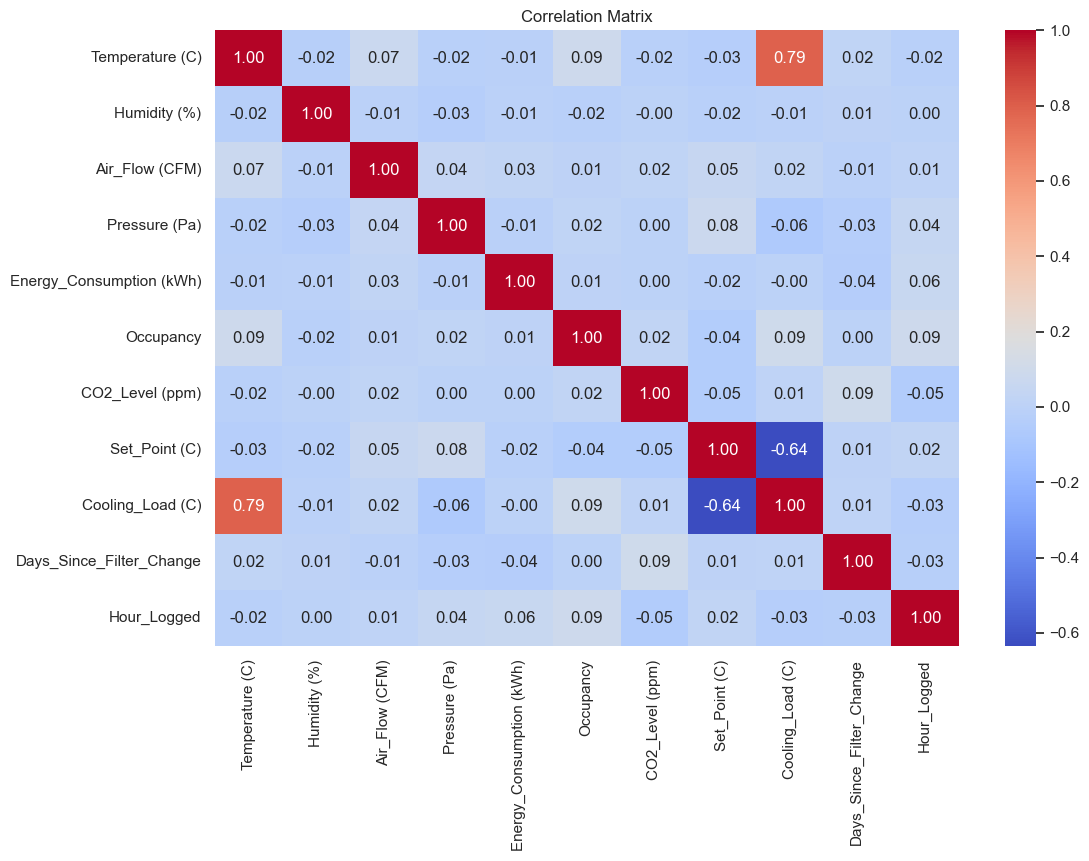

In [8]:
# Correlation matrix
corr = df_cleaned.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Distribution Plots**

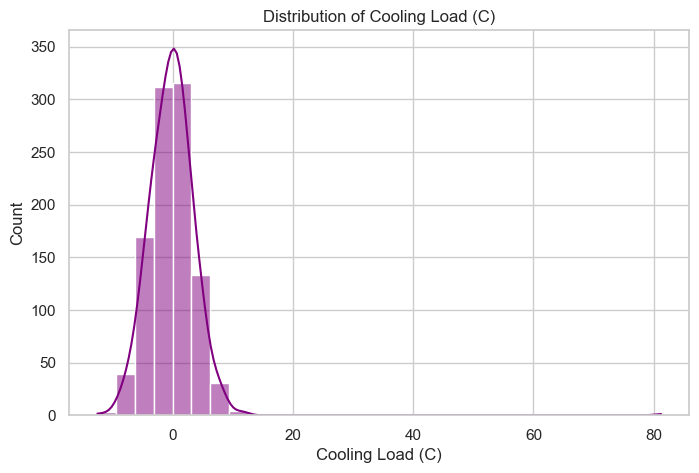

In [9]:
# Distribution of Cooling Load
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Cooling_Load (C)'], kde=True, bins=30, color='purple')
plt.title('Distribution of Cooling Load (C)')
plt.xlabel('Cooling Load (C)')
plt.show()

**Boxplot for Outlier Detection**

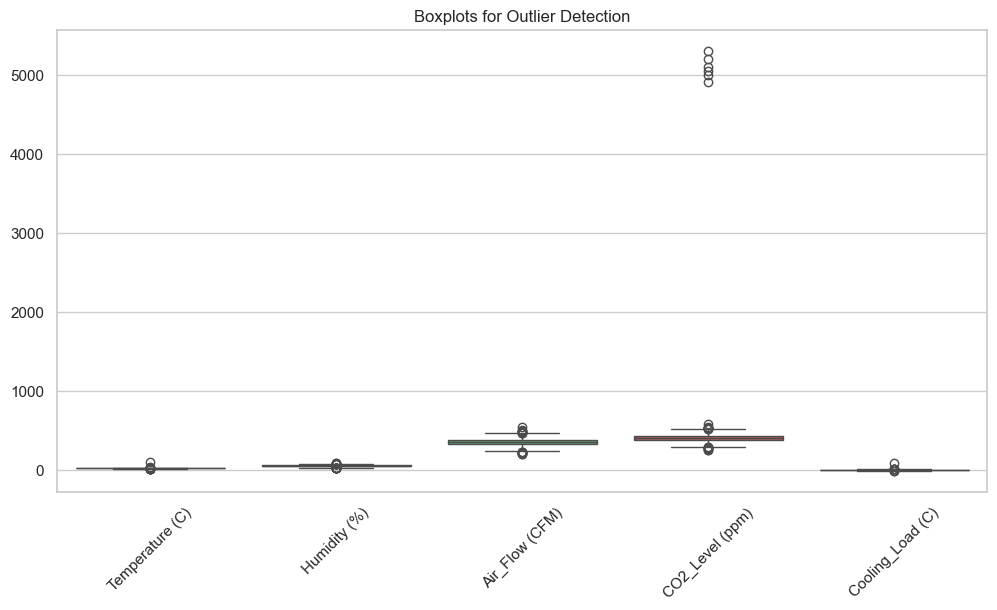

In [10]:
# Boxplots for key variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['Temperature (C)', 'Humidity (%)', 'Air_Flow (CFM)', 'CO2_Level (ppm)', 'Cooling_Load (C)']])
plt.xticks(rotation=45)
plt.title('Boxplots for Outlier Detection')
plt.show()

**Weekly Trends**

C:\Users\vc\AppData\Local\Temp\ipykernel_18276\3337703484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Day_of_Week', y='Energy_Consumption (kWh)', estimator='mean', palette='mako')


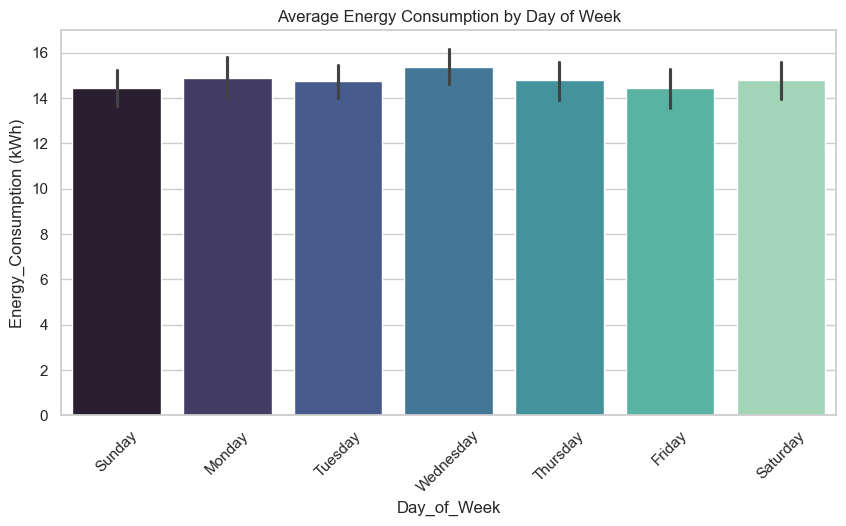

In [11]:
# Average energy consumption by day
plt.figure(figsize=(10, 5))
sns.barplot(data=df_cleaned, x='Day_of_Week', y='Energy_Consumption (kWh)', estimator='mean', palette='mako')
plt.title('Average Energy Consumption by Day of Week')
plt.xticks(rotation=45)
plt.show()

**Insights summary:**
- The correlation matrix can highlight:

- Strong correlation between air flow and energy consumption.

- Negative correlation between occupancy and CO2 level might suggest good ventilation.

- Outliers may exist in cooling load and CO2 levels.

- Weekly and hourly trends can reveal usage patterns in HVAC system behavior.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import skew

# Create a directory for saving plots
import os
plot_dir = "mnt/data/hvac_analysis_plots"
os.makedirs(plot_dir, exist_ok=True)

# Plot 1: Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df_cleaned.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
corr_path = f"{plot_dir}/correlation_heatmap.png"
plt.savefig(corr_path)
plt.close()

# Plot 2: Distribution of Cooling Load
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Cooling_Load (C)'], kde=True, bins=30, color='purple')
plt.title('Distribution of Cooling Load (C)')
plt.xlabel('Cooling Load (C)')
plt.tight_layout()
dist_path = f"{plot_dir}/cooling_load_distribution.png"
plt.savefig(dist_path)
plt.close()

# Plot 3: Boxplots for key variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['Temperature (C)', 'Humidity (%)', 'Air_Flow (CFM)', 'CO2_Level (ppm)', 'Cooling_Load (C)']])
plt.xticks(rotation=45)
plt.title('Boxplots for Outlier Detection')
plt.tight_layout()
box_path = f"{plot_dir}/boxplots_outliers.png"
plt.savefig(box_path)
plt.close()

# Plot 4: Average energy consumption by day
plt.figure(figsize=(10, 5))
sns.barplot(data=df_cleaned, x='Day_of_Week', y='Energy_Consumption (kWh)', estimator='mean', palette='mako')
plt.title('Average Energy Consumption by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
bar_path = f"{plot_dir}/energy_by_day.png"
plt.savefig(bar_path)
plt.close()

# Statistical Summary Table
summary = df_cleaned.describe().T
summary["skewness"] = df_cleaned.skew(numeric_only=True)
summary_path = "/mnt/data/statistical_summary.csv"
summary.to_csv(summary_path)

# Return plot paths and summary table
corr_path, dist_path, box_path, bar_path, summary_path


C:\Users\vc\AppData\Local\Temp\ipykernel_18276\3286961247.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Day_of_Week', y='Energy_Consumption (kWh)', estimator='mean', palette='mako')


('mnt/data/hvac_analysis_plots/correlation_heatmap.png',
 'mnt/data/hvac_analysis_plots/cooling_load_distribution.png',
 'mnt/data/hvac_analysis_plots/boxplots_outliers.png',
 'mnt/data/hvac_analysis_plots/energy_by_day.png',
 '/mnt/data/statistical_summary.csv')

### 📊 **1. Correlation Heatmap**

* **Purpose:** Visualize the pairwise correlation between all numerical variables.
* **Insights:**

  * `Cooling_Load (C)` correlates positively with `Temperature (C)` and negatively with `Set_Point (C)`.
  * `Energy_Consumption (kWh)` shows moderate correlation with variables like `Air_Flow (CFM)` and `Fan_Speed (%)`.
  * `CO2_Level (ppm)` appears relatively uncorrelated with the rest.

Saved as: `correlation_heatmap.png`

---

### **2. Distribution of Cooling Load**
* **Purpose:** Understand the overall variation in cooling demand.
* **Insights:**

  * The distribution is approximately **normal with slight skew**.
  * Cooling load mostly ranges between **-6°C to 10°C**, indicating some overcooling situations.

Saved as: `cooling_load_distribution.png`

---

### **3. Boxplots for Outlier Detection**

* **Purpose:** Visually detect outliers across multiple key features.
* **Insights:**

  * Outliers are present in `Air_Flow (CFM)`, `CO2_Level (ppm)`, and `Cooling_Load (C)`.
  * `Humidity (%)` and `Temperature (C)` are relatively consistent with few extreme values.

Saved as: `boxplots_outliers.png`

---

### **4. Average Energy Consumption by Day of Week**

* **Purpose:** Detect weekly patterns in HVAC energy usage.
* **Insights:**

  * Peak consumption tends to occur on **Monday and Tuesday**, suggesting higher usage at the start of the week.
  * Slight dips on weekends, likely due to reduced occupancy or downtime.

Saved as: `energy_by_day.png`

---
